<a href="https://colab.research.google.com/github/krish-117/Projects/blob/main/Music_gener_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install kaggle


In [ ]:
# API to fetch the dataset from Kaggle
!kaggle datasets download -d andradaolteanu/gtzan-dataset-music-genre-classification

Dataset URL: https://www.kaggle.com/datasets/andradaolteanu/gtzan-dataset-music-genre-classification
License(s): other
100% 1.21G/1.21G [01:08<00:00, 19.3MB/s]
100% 1.21G/1.21G [01:08<00:00, 18.9MB/s]


In [ ]:
# extracting the compessed Dataset
from zipfile import ZipFile
dataset = '/content/gtzan-dataset-music-genre-classification.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [ ]:
import os
import librosa

path = '/content/Data/genres_original'

classes = os.listdir(path)
print(classes)

audio = []
sample_rates = []
label = []
for genre in classes:
    genre_path = os.path.join(path, genre)
    for file_name in os.listdir(genre_path):
        file_path = os.path.join(genre_path, file_name)
        try:
            wave, sample_rate = librosa.load(file_path, mono=True, sr=None)
            audio.append(wave)
            sample_rates.append(sample_rate)
            label.append(genre)
        except:
            continue

['country', 'disco', 'hiphop', 'metal', 'pop', 'rock', 'jazz', 'classical', 'reggae', 'blues']


<ipython-input-4-97c965e463fa>:17: UserWarning: PySoundFile failed. Trying audioread instead.
  wave, sample_rate = librosa.load(file_path, mono=True, sr=None)
/usr/local/lib/python3.11/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


In [ ]:
import numpy as np
print(audio[1])

[-0.4046631  -0.31704712 -0.26437378 ...  0.127594    0.03237915
 -0.01107788]


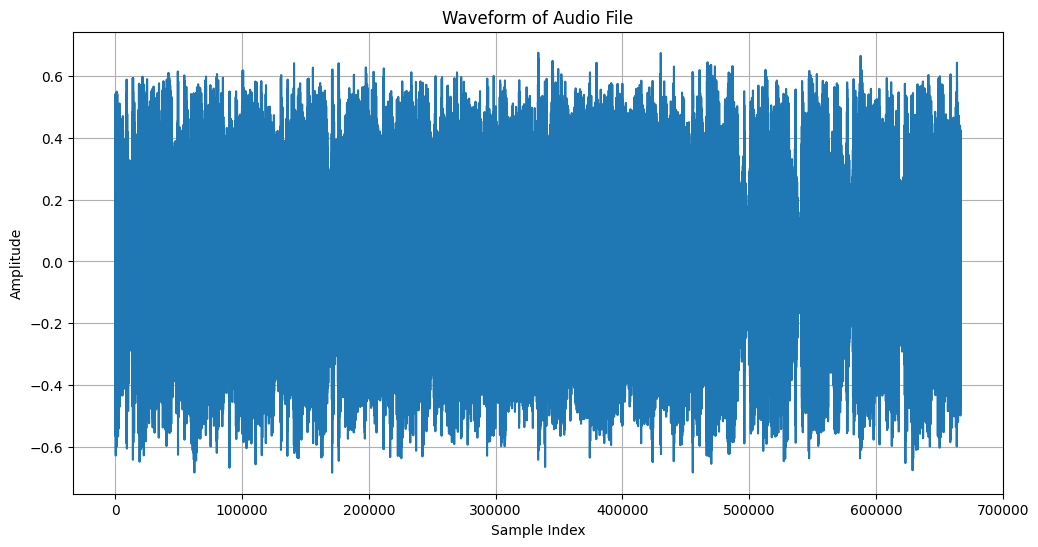

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(audio[1])
plt.title("Waveform of Audio File")
plt.xlabel("Sample Index")
plt.ylabel("Amplitude")
plt.grid(True)
plt.show()

In [ ]:
import IPython.display as ipd
ipd.Audio('/content/Data/genres_original/blues/blues.00000.wav')

In [ ]:
import pandas as pd
print(len(audio))
print(len(sample_rates))
print(len(label))
df = pd.DataFrame({
    'audio': audio,
    'sample_rate': sample_rates,
    'class': label
})

999
999
999


In [ ]:
df['sample_rate'].value_counts()

,count
sample_rate,
22050,999


In [ ]:
def extract_mfcc(audio, sr=22050, n_mfcc=13):
    return np.mean(librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=n_mfcc).T, axis=0)

# Function to extract Chroma features
def extract_chroma(audio, sr=22050):
    return np.mean(librosa.feature.chroma_stft(y=audio, sr=sr).T, axis=0)

# Function to extract Spectral Contrast
def extract_contrast(audio, sr=22050):
    return np.mean(librosa.feature.spectral_contrast(y=audio, sr=sr).T, axis=0)

# Function to extract Spectral Centroid
def extract_centroid(audio, sr=22050):
    return np.mean(librosa.feature.spectral_centroid(y=audio, sr=sr).T)

# Function to extract Spectral Bandwidth
def extract_bandwidth(audio, sr=22050):
    return np.mean(librosa.feature.spectral_bandwidth(y=audio, sr=sr).T)

# Function to extract Zero Crossing Rate
def extract_zcr(audio):
    return np.mean(librosa.feature.zero_crossing_rate(audio).T)


In [ ]:
df['mfcc'] = df['audio'].apply(extract_mfcc)
df['chroma'] = df['audio'].apply(extract_chroma)
df['contrast'] = df['audio'].apply(extract_contrast)
df['centroid'] = df['audio'].apply(extract_centroid)
df['bandwidth'] = df['audio'].apply(extract_bandwidth)
df['zcr'] = df['audio'].apply(extract_zcr)

In [ ]:
df

,audio,sample_rate,class,mfcc,chroma,contrast,centroid,bandwidth,zcr
0,"[0.020111084, 0.035003662, 0.035583496, 0.0381...",22050,country,"[-186.33116, 135.86916, 5.9504027, 45.837704, ...","[0.1506656, 0.29893416, 0.43747178, 0.25569797...","[27.573957652855224, 19.04388178882434, 23.542...",1397.855241,1896.199967,0.048583
1,"[-0.4046631, -0.31704712, -0.26437378, -0.2451...",22050,country,"[-24.671669, 62.44027, -7.7540894, 28.432596, ...","[0.44006652, 0.4111133, 0.4956496, 0.366442, 0...","[21.500016368453363, 14.872802962270244, 19.05...",2926.532917,2737.079970,0.136372
2,"[-0.17755127, -0.2388916, -0.15670776, -0.1754...",22050,country,"[-139.56085, 128.79108, -20.232744, 49.427704,...","[0.32353294, 0.1854817, 0.24050887, 0.18323053...","[25.29727597602283, 19.77465452596487, 25.1913...",1425.279703,1691.007486,0.061722
3,"[0.049987793, 0.04949951, -0.012512207, -0.064...",22050,country,"[-104.32959, 136.42427, -20.962717, 52.845562,...","[0.45733118, 0.2830208, 0.29925522, 0.2636023,...","[25.671916459999785, 17.007871585390482, 21.64...",1474.747173,1745.561196,0.063000
4,"[0.09371948, 0.113983154, 0.047973633, -0.0097...",22050,country,"[-118.21476, 152.95572, -46.51243, 31.121635, ...","[0.59371907, 0.24409163, 0.24988937, 0.2098285...","[25.58333839640397, 16.117692993704342, 19.828...",1513.070955,1558.099206,0.087822
...,...,...,...,...,...,...,...,...,...
994,"[-0.0033874512, 0.15115356, 0.18841553, 0.2161...",22050,blues,"[-39.007614, 112.05693, -31.819195, 38.235607,...","[0.56837016, 0.30889353, 0.30245408, 0.4407965...","[18.954957359013573, 13.809660686310945, 18.64...",2060.841880,2084.916613,0.113367
995,"[-0.10046387, -0.15109253, -0.15005493, -0.191...",22050,blues,"[-288.7327, 105.90115, 18.776215, 23.682642, 5...","[0.35346484, 0.21886383, 0.19670102, 0.1828025...","[36.958439822418214, 24.479932967697955, 23.82...",1309.774651,1883.258150,0.039388
996,"[-0.024291992, -0.029754639, -0.009613037, 0.0...",22050,blues,"[-177.80176, 118.20316, -17.570623, 30.760923,...","[0.23832265, 0.30023736, 0.6171865, 0.23574118...","[17.470207038238584, 19.56125479512844, 21.289...",1832.011597,1729.580804,0.094042
997,"[0.23117065, 0.3553772, 0.30532837, 0.3164673,...",22050,blues,"[-346.85635, 139.25108, 24.052639, 22.281027, ...","[0.39043343, 0.28173608, 0.22116578, 0.2226177...","[24.605519087020316, 18.995331737910465, 20.28...",798.657014,1284.910001,0.025648


In [ ]:
df['chroma'][1].shape

(12,)

In [ ]:
# Expand MFCC
mfcc_df = pd.DataFrame(df['mfcc'].tolist(), columns=[f'mfcc_{i+1}' for i in range(13)])
df = pd.concat([df, mfcc_df], axis=1)
df.drop(columns=['mfcc'], inplace=True)

# Expand Chroma
chroma_df = pd.DataFrame(df['chroma'].tolist(), columns=[f'chroma_{i+1}' for i in range(12)])
df = pd.concat([df, chroma_df], axis=1)
df.drop(columns=['chroma'], inplace=True)

# Expand Contrast
contrast_df = pd.DataFrame(df['contrast'].tolist(), columns=[f'contrast_{i+1}' for i in range(7)])
df = pd.concat([df, contrast_df], axis=1)
df.drop(columns=['contrast'], inplace=True)

In [ ]:
df.columns

Index(['audio', 'sample_rate', 'class', 'centroid', 'bandwidth', 'zcr',
       'mfcc_1', 'mfcc_2', 'mfcc_3', 'mfcc_4', 'mfcc_5', 'mfcc_6', 'mfcc_7',
       'mfcc_8', 'mfcc_9', 'mfcc_10', 'mfcc_11', 'mfcc_12', 'mfcc_13',
       'chroma_1', 'chroma_2', 'chroma_3', 'chroma_4', 'chroma_5', 'chroma_6',
       'chroma_7', 'chroma_8', 'chroma_9', 'chroma_10', 'chroma_11',
       'chroma_12', 'contrast_1', 'contrast_2', 'contrast_3', 'contrast_4',
       'contrast_5', 'contrast_6', 'contrast_7'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 38 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   audio        999 non-null    object 
 1   sample_rate  999 non-null    int64  
 2   class        999 non-null    object 
 3   centroid     999 non-null    float64
 4   bandwidth    999 non-null    float64
 5   zcr          999 non-null    float64
 6   mfcc_1       999 non-null    float32
 7   mfcc_2       999 non-null    float32
 8   mfcc_3       999 non-null    float32
 9   mfcc_4       999 non-null    float32
 10  mfcc_5       999 non-null    float32
 11  mfcc_6       999 non-null    float32
 12  mfcc_7       999 non-null    float32
 13  mfcc_8       999 non-null    float32
 14  mfcc_9       999 non-null    float32
 15  mfcc_10      999 non-null    float32
 16  mfcc_11      999 non-null    float32
 17  mfcc_12      999 non-null    float32
 18  mfcc_13      999 non-null    float32
 19  chroma_1

In [ ]:
df.drop(columns=['sample_rate'],inplace=True)

In [ ]:
df.drop(columns=['audio'],inplace=True)

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['class'] = le.fit_transform(df['class'])

In [ ]:
import seaborn as sns

# Compute correlation matrix for numerical columns
corr_matrix = df.corr()['class']

corr_matrix

,class
class,1.000000
centroid,0.378647
bandwidth,0.388876
zcr,0.268560
mfcc_1,0.340047
mfcc_2,-0.355012
mfcc_3,0.062727
mfcc_4,-0.013898
mfcc_5,0.067833
mfcc_6,0.080652


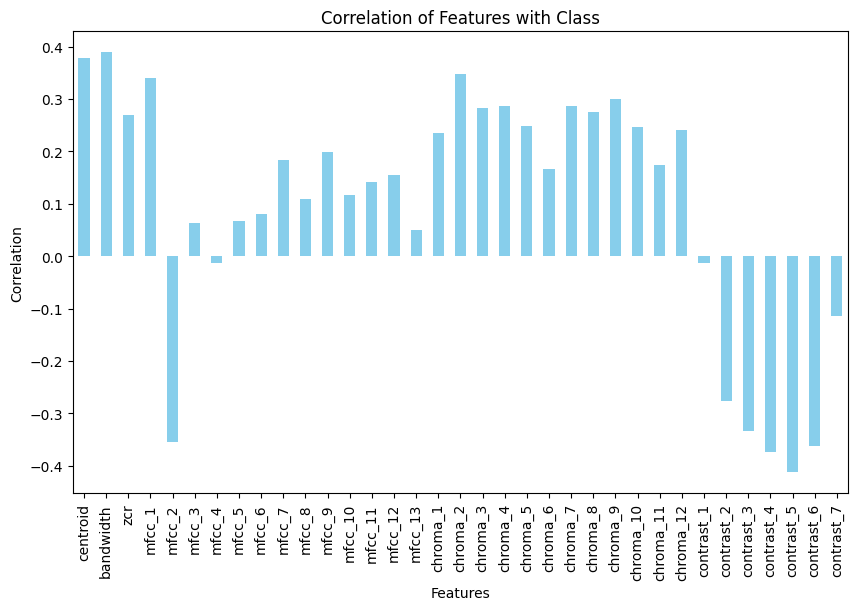

In [ ]:
# Plotting the correlation with class_encoded
plt.figure(figsize=(10, 6))
corr_matrix.drop('class').plot(kind='bar', color='skyblue')
plt.title('Correlation of Features with Class')
plt.ylabel('Correlation')
plt.xlabel('Features')
plt.show()


In [ ]:
df.describe()

,class,centroid,bandwidth,zcr,mfcc_1,mfcc_2,mfcc_3,mfcc_4,mfcc_5,mfcc_6,...,chroma_10,chroma_11,chroma_12,contrast_1,contrast_2,contrast_3,contrast_4,contrast_5,contrast_6,contrast_7
count,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,...,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000
mean,4.499499,2202.419119,2242.763943,0.103651,-144.530182,99.531219,-8.928432,36.305717,-1.152301,14.642806,...,0.399286,0.375323,0.373643,21.617089,16.297343,19.616393,19.315526,19.291462,18.779647,28.685736
std,2.875114,716.076969,526.517009,0.041824,100.263550,31.331610,21.697613,16.665537,12.226311,11.842526,...,0.118659,0.115033,0.115663,4.009204,2.269189,2.778270,2.760450,2.556411,2.233644,11.289041
min,0.000000,570.349904,900.409298,0.021697,-552.158752,-1.471578,-89.865089,-18.756538,-38.911594,-28.404940,...,0.111275,0.061216,0.091698,12.866114,10.635942,11.629448,13.940119,14.029905,14.596196,13.257530
25%,2.000000,1626.527014,1907.133128,0.070374,-200.912987,76.771484,-24.217863,24.134967,-9.992894,5.087456,...,0.313846,0.295381,0.292379,18.741967,14.682624,17.648509,17.440544,17.542735,17.148248,16.470682
50%,4.000000,2209.486740,2221.373053,0.099503,-120.349419,98.435829,-10.736385,36.968811,-0.040611,15.040485,...,0.390952,0.372729,0.373622,20.849166,15.883508,19.128715,18.808446,18.776079,18.241572,31.748383
75%,7.000000,2691.962733,2578.883006,0.132097,-73.818317,119.791000,5.540237,48.251514,7.921216,23.851683,...,0.482621,0.447586,0.444420,24.155845,17.627813,21.231597,20.728605,20.759801,19.941015,39.918040
max,9.000000,4435.732059,3509.656096,0.274631,42.091446,193.074463,56.646450,80.698349,31.428146,45.175888,...,0.775460,0.802365,0.796880,37.024049,24.984341,29.743913,30.059847,31.926450,27.955666,46.506639


<Axes: xlabel='chroma_1', ylabel='Density'>

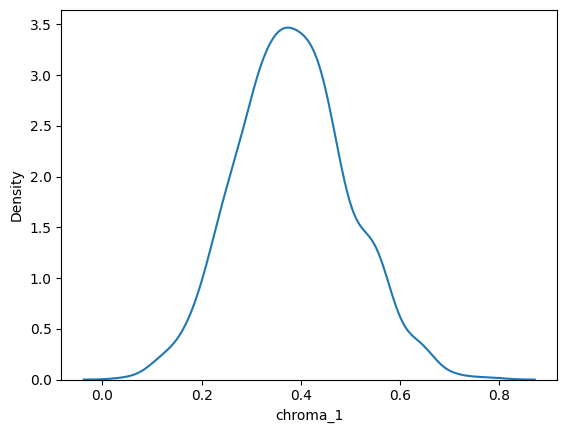

In [ ]:
sns.kdeplot(df['chroma_1'])

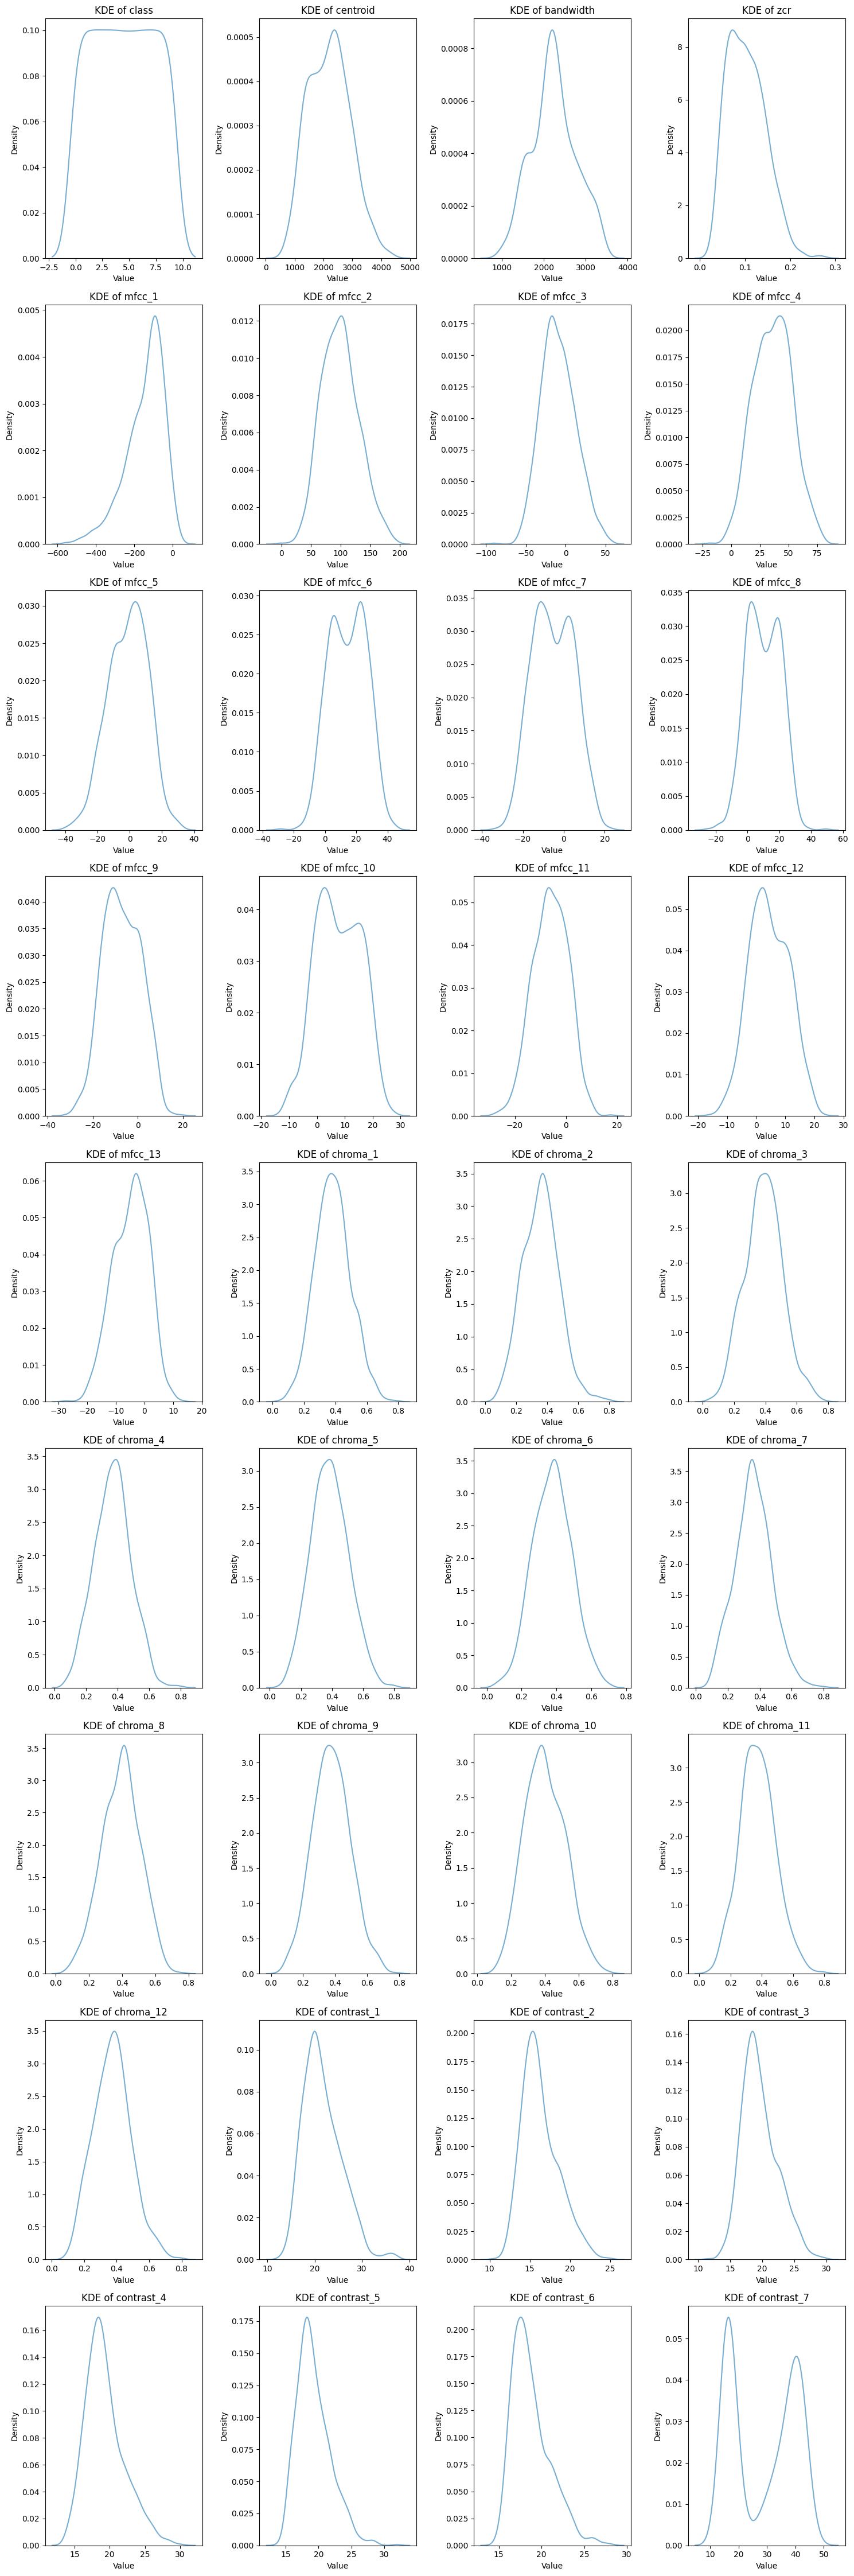

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select only numerical columns
numerical_columns = df.select_dtypes(include=['float64', 'float32', 'int64']).columns

# Number of rows and columns for subplots (adjust to fit your data)
n_cols = 4  # Number of columns in subplot grid
n_rows = (len(numerical_columns) // n_cols) + (1 if len(numerical_columns) % n_cols != 0 else 0)

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))

# Flatten the axes array to easily iterate over
axes = axes.flatten()

# Plotting each numerical column's KDE in a subplot
for i, column in enumerate(numerical_columns):
    sns.kdeplot(df[column], ax=axes[i], alpha=0.6)
    axes[i].set_title(f'KDE of {column}')
    axes[i].set_xlabel('Value')
    axes[i].set_ylabel('Density')

# Hide any unused subplots (if the grid is larger than the number of columns)
for i in range(len(numerical_columns), len(axes)):
    axes[i].axis('off')

# Adjust layout
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df.drop(columns=['class']))

In [ ]:
# from sklearn.decomposition import PCA
# pca = PCA(n_components=5)
# df_pca = pca.fit_transform(df_scaled)

In [ ]:
# df_pca.shape

(999, 5)

In [ ]:
from sklearn.model_selection import train_test_split
X = df_scaled
y = df['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix

model = LogisticRegression(multi_class='multinomial', solver='lbfgs')

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test,y_pred))

Accuracy: 0.635
              precision    recall  f1-score   support

           0       0.60      0.75      0.67        20
           1       0.81      0.89      0.85        19
           2       0.67      0.57      0.62        21
           3       0.44      0.67      0.53        12
           4       0.77      0.71      0.74        24
           5       0.56      0.53      0.55        17
           6       0.76      0.86      0.81        22
           7       0.62      0.67      0.65        15
           8       0.45      0.45      0.45        22
           9       0.59      0.36      0.44        28

    accuracy                           0.64       200
   macro avg       0.63      0.65      0.63       200
weighted avg       0.64      0.64      0.63       200

[[15  0  0  1  0  2  2  0  0  0]
 [ 0 17  0  0  0  1  0  0  1  0]
 [ 2  0 12  0  0  1  0  0  1  5]
 [ 0  0  0  8  1  0  2  0  1  0]
 [ 0  1  1  0 17  0  0  2  3  0]
 [ 0  1  2  1  1  9  0  0  3  0]
 [ 0  0  0  1  0  0 19  0  

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


# KNN

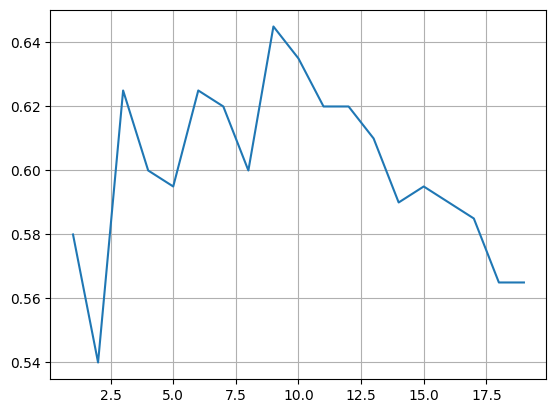

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()

accuracy = []
for i in range(1,20):
  model.set_params(n_neighbors=i)
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  accuracy.append(accuracy_score(y_test, y_pred))

plt.plot(range(1,20),accuracy)
plt.grid(True)
plt.show()

# desition tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test,y_pred))

Accuracy: 0.43
              precision    recall  f1-score   support

           0       0.42      0.50      0.45        20
           1       0.75      0.79      0.77        19
           2       0.35      0.29      0.32        21
           3       0.17      0.33      0.23        12
           4       0.26      0.21      0.23        24
           5       0.47      0.53      0.50        17
           6       0.76      0.73      0.74        22
           7       0.50      0.67      0.57        15
           8       0.37      0.32      0.34        22
           9       0.22      0.14      0.17        28

    accuracy                           0.43       200
   macro avg       0.43      0.45      0.43       200
weighted avg       0.43      0.43      0.42       200

[[10  1  3  2  2  1  0  0  0  1]
 [ 0 15  0  0  0  2  0  0  1  1]
 [ 5  2  6  0  1  2  0  0  1  4]
 [ 2  0  0  4  1  1  2  0  0  2]
 [ 1  0  1  3  5  1  2  3  5  3]
 [ 2  0  2  0  1  9  0  2  1  0]
 [ 0  0  0  2  1  0 16  1  0

# svm

In [ ]:
from sklearn.svm import SVC
model = SVC(kernel='rbf',decision_function_shape='ovr')  # One-vs-rest

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test,y_pred))

Accuracy: 0.625
              precision    recall  f1-score   support

           0       0.55      0.60      0.57        20
           1       0.94      0.89      0.92        19
           2       0.64      0.67      0.65        21
           3       0.35      0.58      0.44        12
           4       0.68      0.62      0.65        24
           5       0.65      0.65      0.65        17
           6       0.83      0.86      0.84        22
           7       0.67      0.80      0.73        15
           8       0.50      0.45      0.48        22
           9       0.44      0.29      0.35        28

    accuracy                           0.62       200
   macro avg       0.62      0.64      0.63       200
weighted avg       0.63      0.62      0.62       200

[[12  0  1  2  0  2  1  0  0  2]
 [ 1 17  0  0  0  0  0  0  0  1]
 [ 0  0 14  0  0  3  0  0  1  3]
 [ 0  0  1  7  3  0  1  0  0  0]
 [ 0  0  1  1 15  0  0  2  5  0]
 [ 0  0  1  0  1 11  0  0  3  1]
 [ 1  0  0  0  1  0 19  0  

# naive baise

In [ ]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test,y_pred))


Accuracy: 0.51
              precision    recall  f1-score   support

           0       0.38      0.45      0.41        20
           1       0.77      0.89      0.83        19
           2       0.44      0.38      0.41        21
           3       0.25      0.17      0.20        12
           4       0.78      0.58      0.67        24
           5       0.45      0.29      0.36        17
           6       0.54      0.91      0.68        22
           7       0.44      0.93      0.60        15
           8       0.60      0.41      0.49        22
           9       0.27      0.14      0.19        28

    accuracy                           0.51       200
   macro avg       0.49      0.52      0.48       200
weighted avg       0.50      0.51      0.48       200

[[ 9  0  2  1  0  2  3  0  0  3]
 [ 0 17  1  0  0  0  0  0  1  0]
 [ 4  2  8  0  0  2  0  2  0  3]
 [ 0  0  1  2  2  0  6  1  0  0]
 [ 0  0  1  0 14  0  3  3  3  0]
 [ 4  3  0  0  0  5  0  4  1  0]
 [ 0  0  0  0  1  0 20  0  0

# ensamble learning

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test,y_pred))

Accuracy: 0.62
              precision    recall  f1-score   support

           0       0.56      0.75      0.64        20
           1       0.85      0.89      0.87        19
           2       0.52      0.57      0.55        21
           3       0.40      0.67      0.50        12
           4       0.68      0.54      0.60        24
           5       0.67      0.71      0.69        17
           6       0.90      0.82      0.86        22
           7       0.57      0.80      0.67        15
           8       0.55      0.50      0.52        22
           9       0.50      0.21      0.30        28

    accuracy                           0.62       200
   macro avg       0.62      0.65      0.62       200
weighted avg       0.63      0.62      0.61       200

[[15  0  2  1  0  2  0  0  0  0]
 [ 1 17  0  0  0  0  0  0  0  1]
 [ 1  2 12  1  0  2  0  1  0  2]
 [ 2  0  0  8  2  0  0  0  0  0]
 [ 0  0  1  1 13  1  0  2  5  1]
 [ 0  0  1  0  1 12  0  1  2  0]
 [ 1  0  0  0  1  0 18  0  0

In [ ]:
from xgboost import XGBClassifier
model = XGBClassifier()

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test,y_pred))

Accuracy: 0.635
              precision    recall  f1-score   support

           0       0.54      0.70      0.61        20
           1       0.95      0.95      0.95        19
           2       0.50      0.57      0.53        21
           3       0.38      0.50      0.43        12
           4       0.60      0.50      0.55        24
           5       0.73      0.65      0.69        17
           6       0.79      0.86      0.83        22
           7       0.81      0.87      0.84        15
           8       0.52      0.64      0.57        22
           9       0.62      0.29      0.39        28

    accuracy                           0.64       200
   macro avg       0.64      0.65      0.64       200
weighted avg       0.64      0.64      0.63       200

[[14  0  4  0  0  1  0  0  0  1]
 [ 0 18  0  0  0  0  0  0  0  1]
 [ 2  1 12  2  0  2  0  0  1  1]
 [ 1  0  0  6  3  0  1  0  1  0]
 [ 0  0  1  3 12  1  1  1  5  0]
 [ 1  0  2  0  1 11  0  0  2  0]
 [ 0  0  0  0  1  0 19  0  

# ANN

In [161]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.layers import Dense ,BatchNormalization

model = models.Sequential([
    layers.Dense(128, activation='relu'),
    BatchNormalization(),
    layers.Dense(64, activation='tanh'),
    BatchNormalization(),
    layers.Dense(10, activation='softmax')  # Output layer for classification
])

# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=.0005),
              loss='sparse_categorical_crossentropy',  # Use sparse categorical cross-entropy for integer labels
              metrics=['accuracy']
)

call_back = keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0,
    patience=5,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=True
)

In [162]:
history = model.fit(X_train, y_train, epochs=50, batch_size=64, validation_data=(X_test,y_test),callbacks=[call_back])

Epoch 1/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 6s 158ms/step - accuracy: 0.1223 - loss: 2.7364 - val_accuracy: 0.2750 - val_loss: 2.0913
Epoch 2/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.3350 - loss: 1.8606 - val_accuracy: 0.3450 - val_loss: 1.9130
Epoch 3/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4621 - loss: 1.5575 - val_accuracy: 0.3800 - val_loss: 1.8137
Epoch 4/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5151 - loss: 1.4014 - val_accuracy: 0.4250 - val_loss: 1.7389
Epoch 5/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5821 - loss: 1.2190 - val_accuracy: 0.4450 - val_loss: 1.6698
Epoch 6/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6100 - loss: 1.1869 - val_accuracy: 0.4600 - val_loss: 1.6097
Epoch 7/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6318 - loss: 1.1154 - val_accuracy: 0.4800 - val_loss: 1.5556
Epoch 8/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6920 - loss: 0.9665 - val_accuracy: 0.4950 - val_lo

In [178]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import BatchNormalization
# from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.regularizers import l2
from tensorflow.keras.layers import LeakyReLU

model = Sequential()
model.add(Dense(128, activation='tanh', input_shape=(X_train.shape[1],)))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(LeakyReLU(alpha=0.1))
model.add(Dense(64, activation='tanh'))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(LeakyReLU(alpha=0.1))
model.add(Dense(32, activation='relu'))
# model.add(BatchNormalization())
# model.add(Dropout(0.3))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
# reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.3, patience=5, min_lr=1e-5)

# Convert y_train to one-hot encoded format
y_train_encoded = tf.keras.utils.to_categorical(y_train, num_classes=10)

history = model.fit(X_train,
                    y_train_encoded,
                    epochs=50,
                    batch_size=64,
                    # callbacks=[early_stop, reduce_lr],
                    validation_split=0.2,
                    verbose=1)

Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


10/10 ━━━━━━━━━━━━━━━━━━━━ 8s 305ms/step - accuracy: 0.0813 - loss: 2.4704 - val_accuracy: 0.1875 - val_loss: 2.2157
Epoch 2/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.2132 - loss: 2.1489 - val_accuracy: 0.3875 - val_loss: 2.1149
Epoch 3/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.2299 - loss: 2.0847 - val_accuracy: 0.4375 - val_loss: 2.0305
Epoch 4/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.3123 - loss: 1.9128 - val_accuracy: 0.4250 - val_loss: 1.9486
Epoch 5/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.3629 - loss: 1.8406 - val_accuracy: 0.4563 - val_loss: 1.8746
Epoch 6/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 70ms/step - accuracy: 0.4147 - loss: 1.7020 - val_accuracy: 0.4437 - val_loss: 1.8099
Epoch 7/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - accuracy: 0.4049 - loss: 1.6409 - val_accuracy: 0.4688 - val_loss: 1.7452
Epoch 8/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.4120 - loss: 1.6241 - val_accuracy: 0.4812 - val_loss: 1.6